In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

warnings.filterwarnings("ignore")
%matplotlib inline

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer

In [59]:
df=pd.read_csv(r"E:\Ineuron may batch projects\Projects\Concrete strength\note_book\ConcreteStrengthData.csv")

In [60]:
df1=df.copy()

In [61]:
df.head()

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [62]:
df.tail()

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.40


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CementComponent            1030 non-null   float64
 1   BlastFurnaceSlag           1030 non-null   float64
 2   FlyAshComponent            1030 non-null   float64
 3   WaterComponent             1030 non-null   float64
 4   SuperplasticizerComponent  1030 non-null   float64
 5   CoarseAggregateComponent   1030 non-null   float64
 6   FineAggregateComponent     1030 non-null   float64
 7   AgeInDays                  1030 non-null   int64  
 8   Strength                   1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [64]:
df.isnull().sum()

CementComponent              0
BlastFurnaceSlag             0
FlyAshComponent              0
WaterComponent               0
SuperplasticizerComponent    0
CoarseAggregateComponent     0
FineAggregateComponent       0
AgeInDays                    0
Strength                     0
dtype: int64

In [65]:
df.corr()

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
CementComponent,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
BlastFurnaceSlag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
FlyAshComponent,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
WaterComponent,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
SuperplasticizerComponent,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
CoarseAggregateComponent,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
FineAggregateComponent,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
AgeInDays,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
Strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


In [66]:
df.columns

Index(['CementComponent', 'BlastFurnaceSlag', 'FlyAshComponent',
       'WaterComponent', 'SuperplasticizerComponent',
       'CoarseAggregateComponent', 'FineAggregateComponent', 'AgeInDays',
       'Strength'],
      dtype='object')

In [67]:
df.describe()

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


Remove Duplicates

In [68]:
def remove_duplicates(data):
    print('Shape before deleting duplicate values:', data.shape)
    
    # Removing duplicate rows if any
    data = data.drop_duplicates()
    
    print('Shape after deleting duplicate values:', data.shape)
    return data
df=remove_duplicates(df)

Shape before deleting duplicate values: (1030, 9)
Shape after deleting duplicate values: (1005, 9)


Unique value percentage

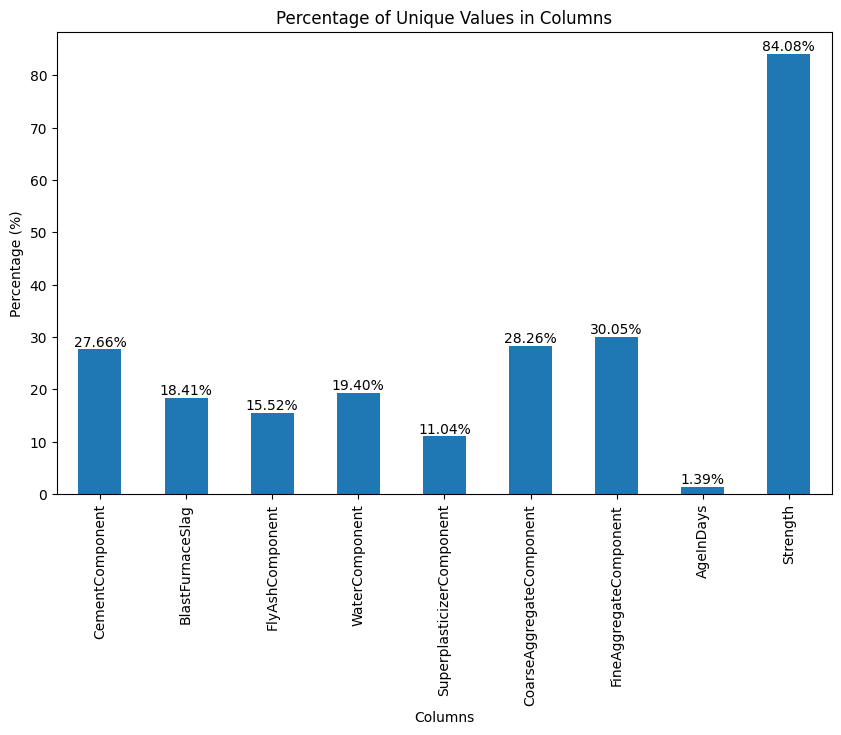

In [69]:
def plot_unique_value_percentage(data):
    unique_percentage = (data.nunique() / len(data)) * 100
    ax = unique_percentage.plot(kind='bar', figsize=(10, 6))
    
    ax.set_title('Percentage of Unique Values in Columns')
    ax.set_xlabel('Columns')
    ax.set_ylabel('Percentage (%)')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
    
    plt.show()

plot_unique_value_percentage(df)

#### Target Dist Plot

<Axes: >

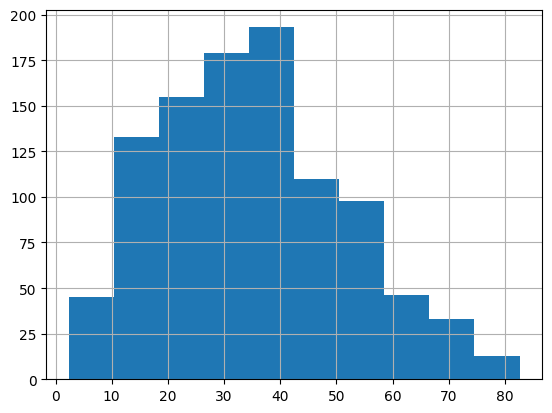

In [70]:
%matplotlib inline
# Creating Bar chart as the Target variable is Continuous
df['Strength'].hist()

In [71]:
df.dtypes

CementComponent              float64
BlastFurnaceSlag             float64
FlyAshComponent              float64
WaterComponent               float64
SuperplasticizerComponent    float64
CoarseAggregateComponent     float64
FineAggregateComponent       float64
AgeInDays                      int64
Strength                     float64
dtype: object

In [72]:
numerical_col =[feature for feature in df.columns if df[feature].dtypes != 'o']

In [74]:
numerical_col


['CementComponent',
 'BlastFurnaceSlag',
 'FlyAshComponent',
 'WaterComponent',
 'SuperplasticizerComponent',
 'CoarseAggregateComponent',
 'FineAggregateComponent',
 'AgeInDays',
 'Strength']

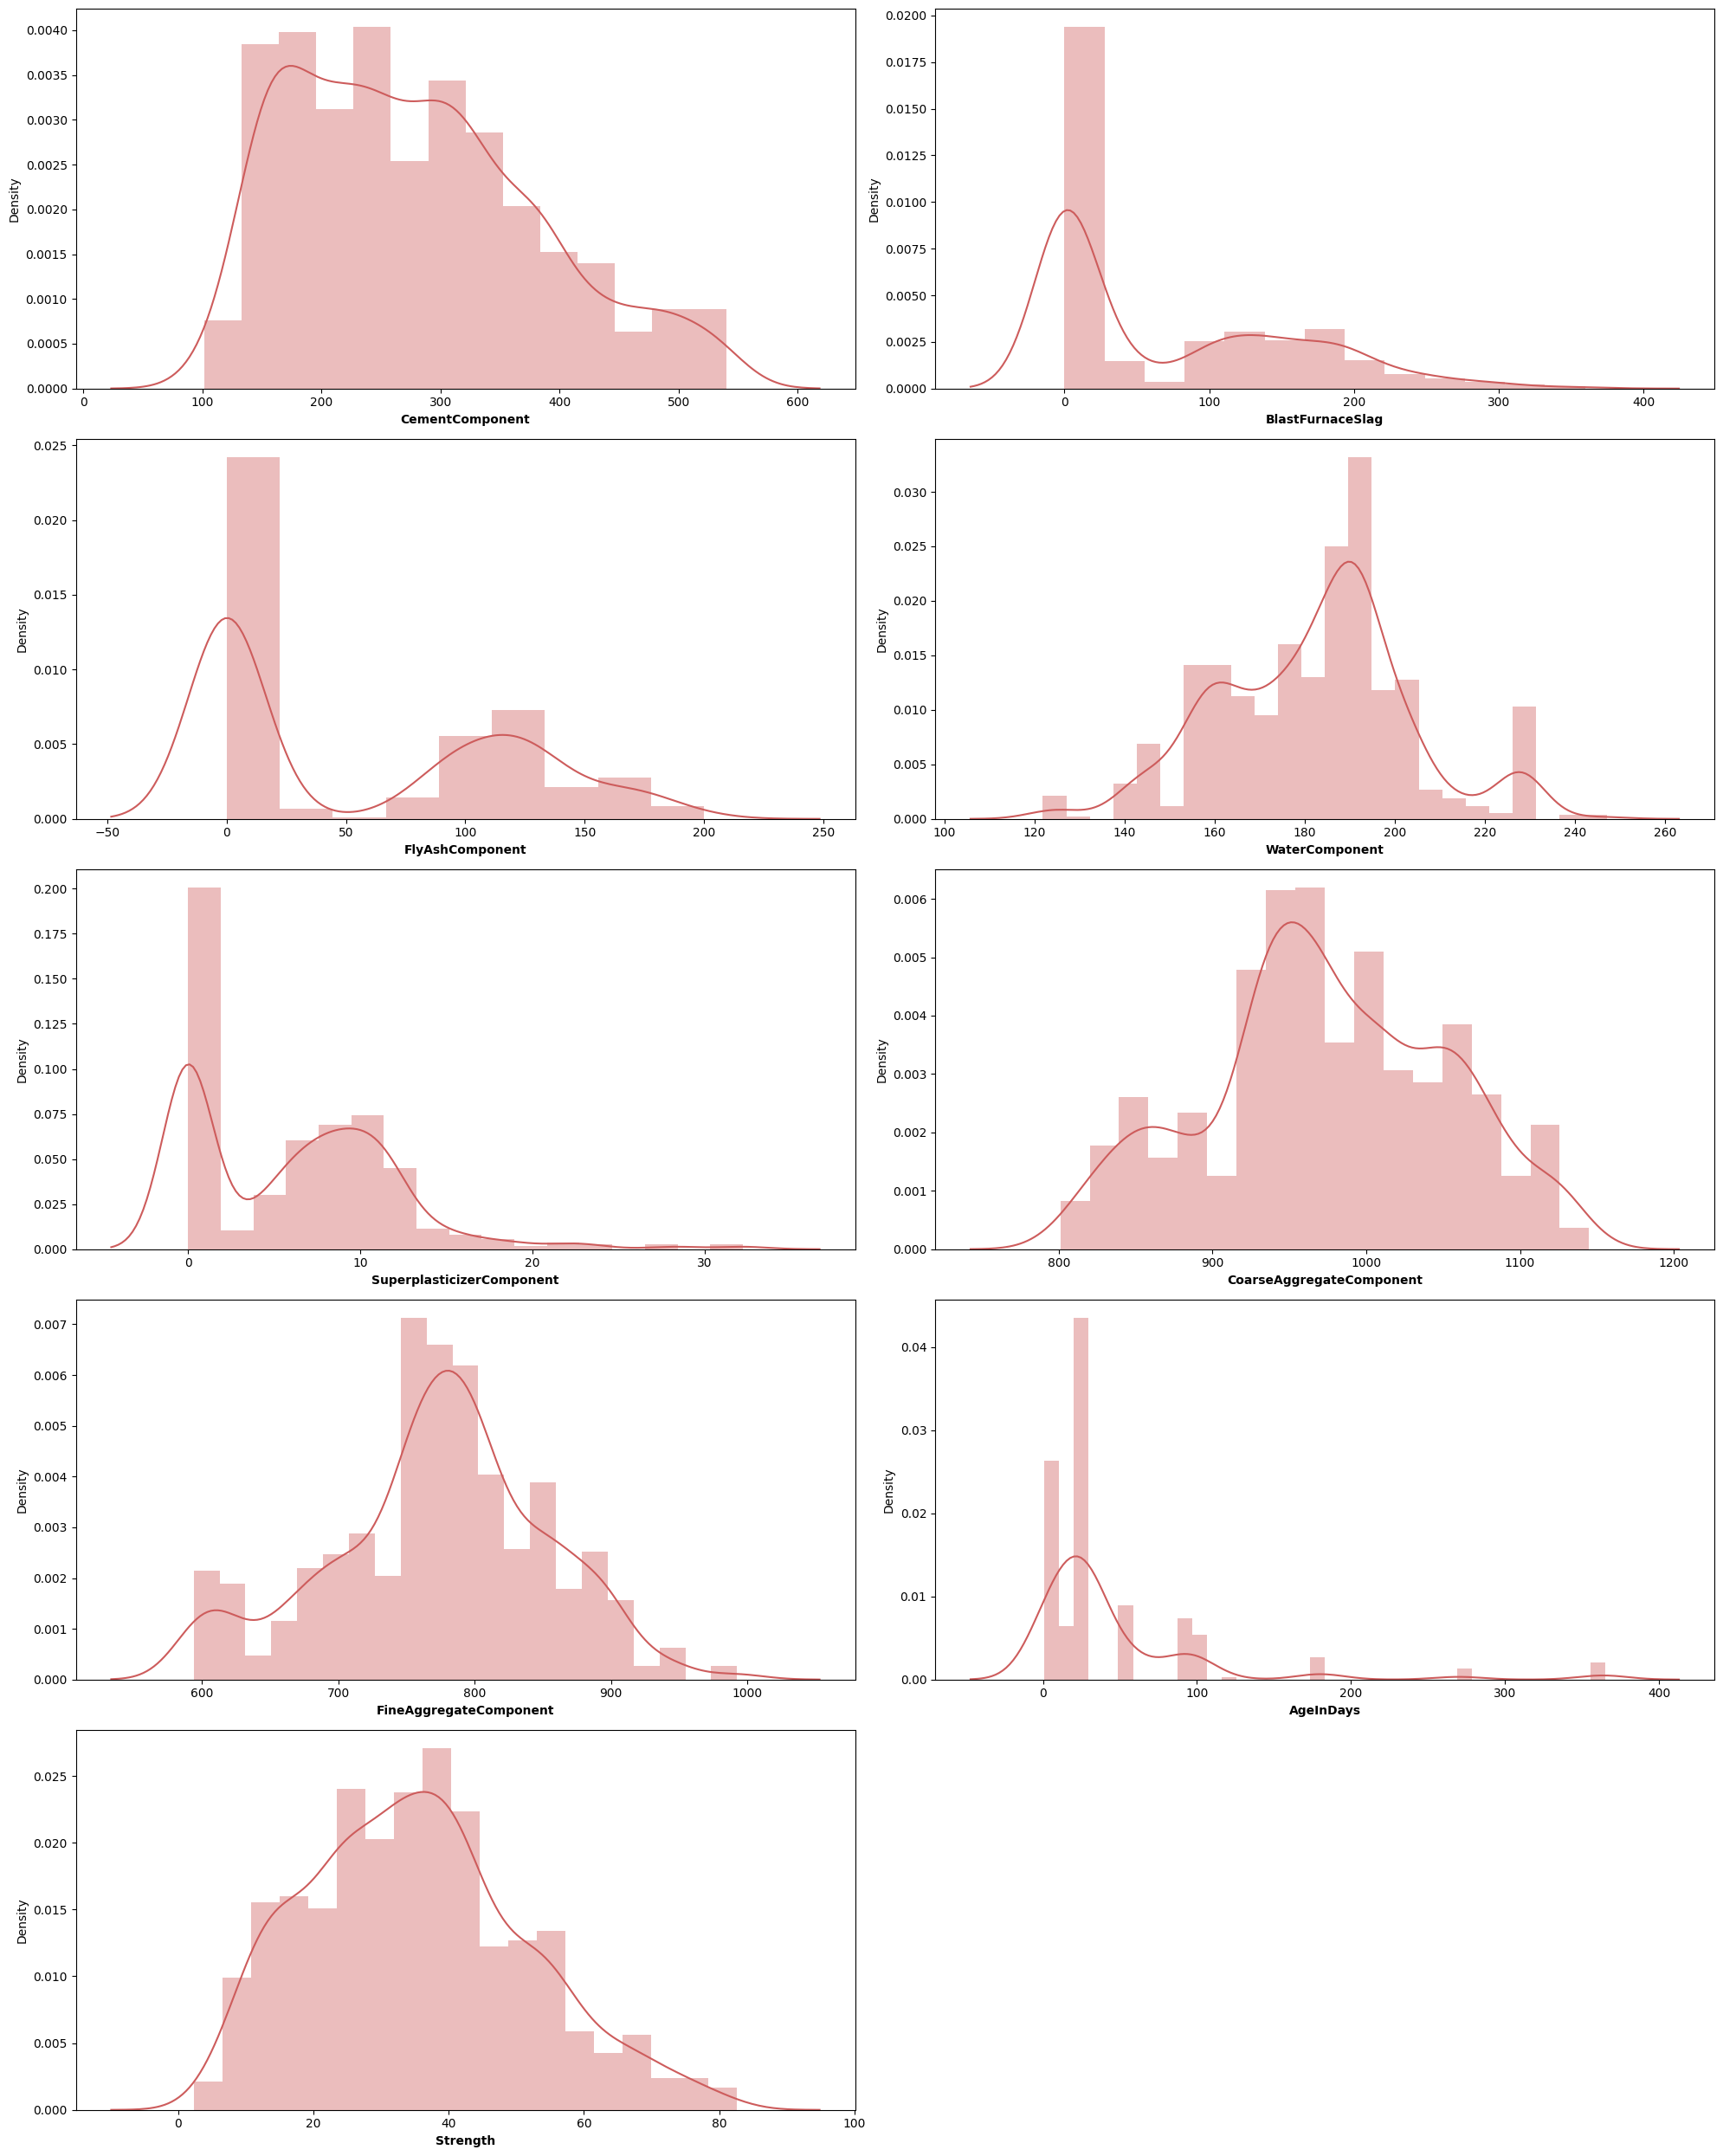

In [75]:

plt.figure(figsize=(20, 25))
for i, col in enumerate(numerical_col):
    plt.subplot(5, 2, i+1)
    sns.distplot(x=df[col], color='indianred')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()
   

##### Data Skewness

· If the skewness is between -0.5 and 0.5, the data are fairly symmetrical

· If the skewness is between -1 and — 0.5 or between 0.5 and 1, the data are moderately skewed

· If the skewness is less than -1 or greater than 1, the data are highly skewed

In [76]:
def check_skewness(df, numerical_col):
    for i in numerical_col:
        skewness = df[i].skew()
        if -0.5 <= skewness <= 0.5:
            print(f"Skewness of {i} column is: {skewness} - Data is normally distributed or fairly symmetrical")
        elif -0.5 > skewness > -1 or 0.5 < skewness < 1:
            print(f"Skewness of {i} column is: {skewness} - Moderately skewed")
        else:
            print(f"Skewness of {i} column is: {skewness} - Highly skewed")
        print()

check_skewness(df, numerical_col)

Skewness of CementComponent column is: 0.5649589710818717 - Moderately skewed

Skewness of BlastFurnaceSlag column is: 0.8552248976041229 - Moderately skewed

Skewness of FlyAshComponent column is: 0.4972312662135868 - Data is normally distributed or fairly symmetrical

Skewness of WaterComponent column is: 0.034433208021637955 - Data is normally distributed or fairly symmetrical

Skewness of SuperplasticizerComponent column is: 0.9806043204539713 - Moderately skewed

Skewness of CoarseAggregateComponent column is: -0.065255998835077 - Data is normally distributed or fairly symmetrical

Skewness of FineAggregateComponent column is: -0.25235318089800507 - Data is normally distributed or fairly symmetrical

Skewness of AgeInDays column is: 3.2539737173312044 - Highly skewed

Skewness of Strength column is: 0.3956961343153939 - Data is normally distributed or fairly symmetrical



cement ,blast_furnace_slag ,fly_ash ,superplasticizer ,concrete_compressive_strength 

##### Log Transform

In [77]:
from sklearn.preprocessing import StandardScaler

In [78]:
scaler= StandardScaler()

In [79]:
df.columns

Index(['CementComponent', 'BlastFurnaceSlag', 'FlyAshComponent',
       'WaterComponent', 'SuperplasticizerComponent',
       'CoarseAggregateComponent', 'FineAggregateComponent', 'AgeInDays',
       'Strength'],
      dtype='object')

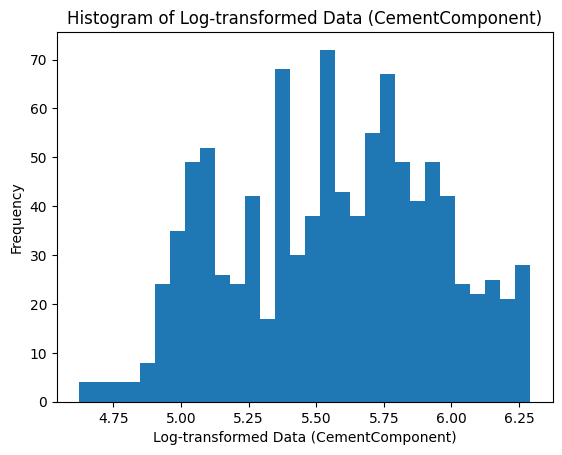

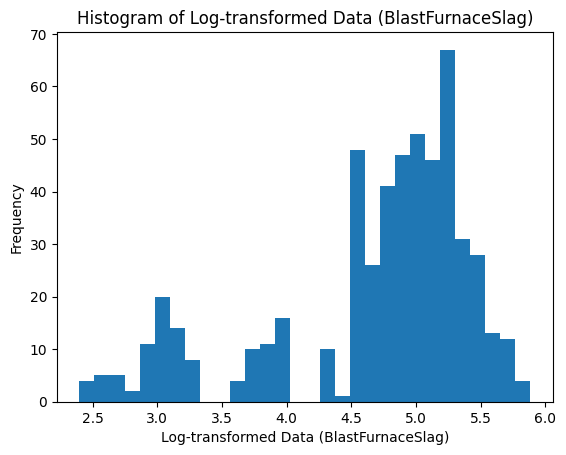

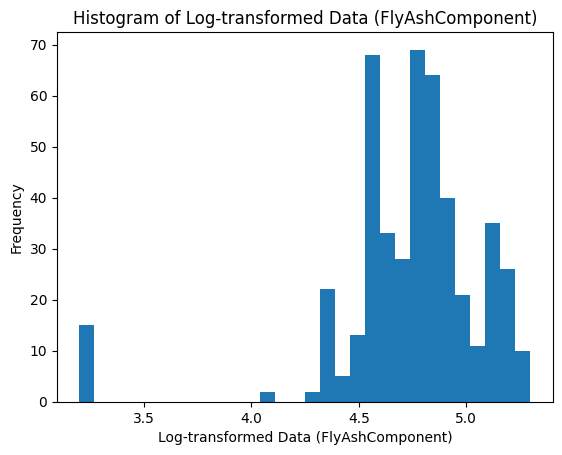

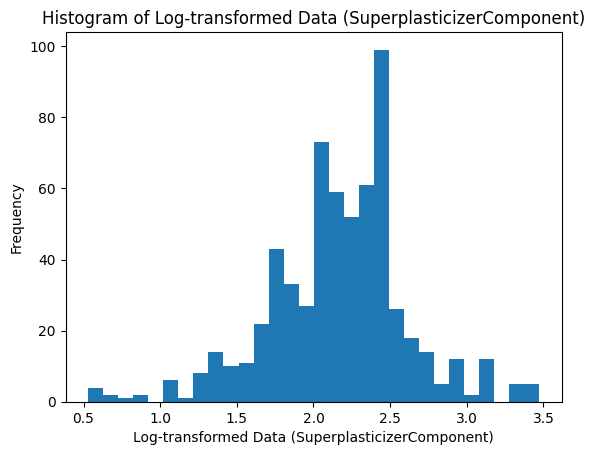

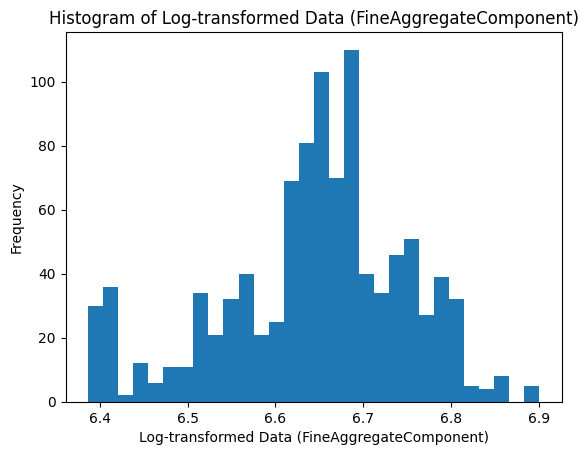

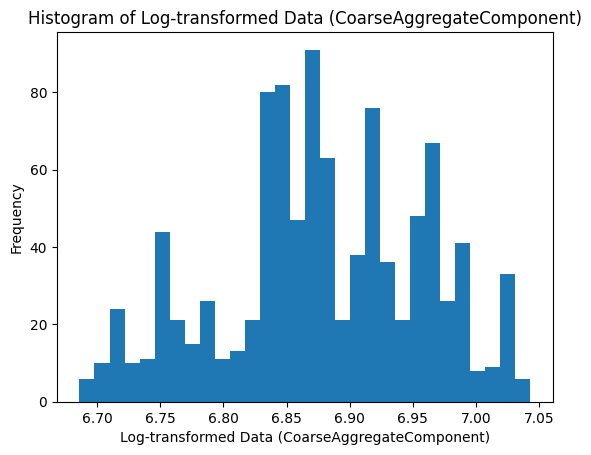

In [81]:
import numpy as np
import matplotlib.pyplot as plt

columns = [ 'CementComponent', 'BlastFurnaceSlag', 'FlyAshComponent', 'SuperplasticizerComponent','FineAggregateComponent',
           'CoarseAggregateComponent']

for column in columns:
    # Filter out negative or zero values
    positive_data = df[column][df[column] > 0]

    # Apply natural logarithm transformation
    log_transformed = np.log(positive_data)


    # Plot histogram of log-transformed data
    plt.hist(log_transformed, bins=30)
    plt.xlabel(f'Log-transformed Data ({column})')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of Log-transformed Data ({column})')
    plt.show()

In [82]:
df.columns

Index(['CementComponent', 'BlastFurnaceSlag', 'FlyAshComponent',
       'WaterComponent', 'SuperplasticizerComponent',
       'CoarseAggregateComponent', 'FineAggregateComponent', 'AgeInDays',
       'Strength'],
      dtype='object')

Scatter Plot

In [83]:
df.columns

Index(['CementComponent', 'BlastFurnaceSlag', 'FlyAshComponent',
       'WaterComponent', 'SuperplasticizerComponent',
       'CoarseAggregateComponent', 'FineAggregateComponent', 'AgeInDays',
       'Strength'],
      dtype='object')

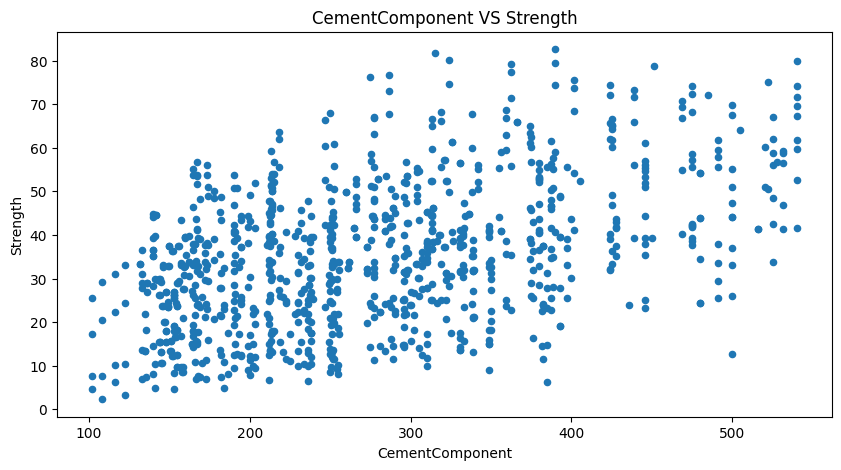

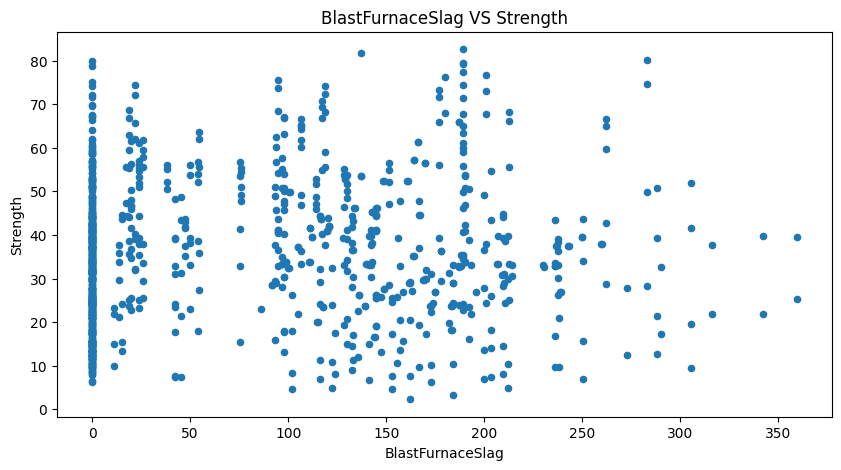

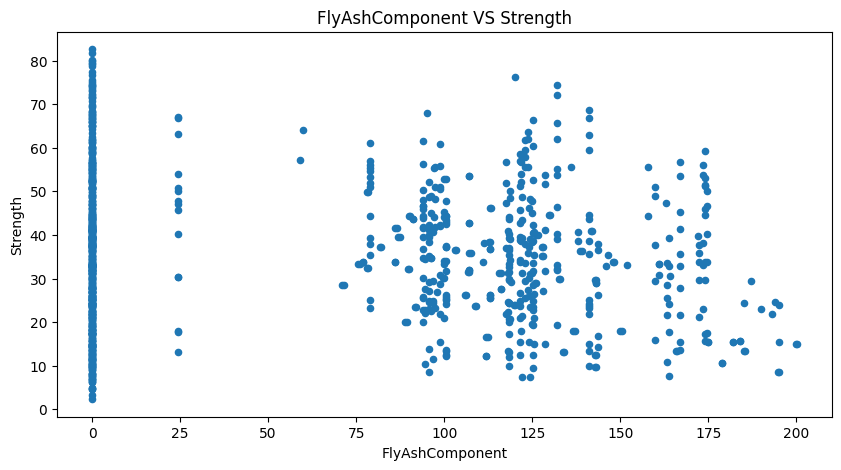

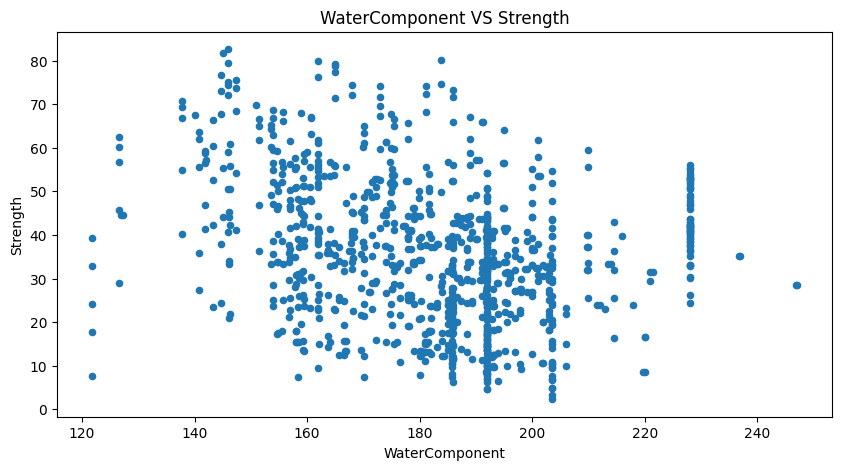

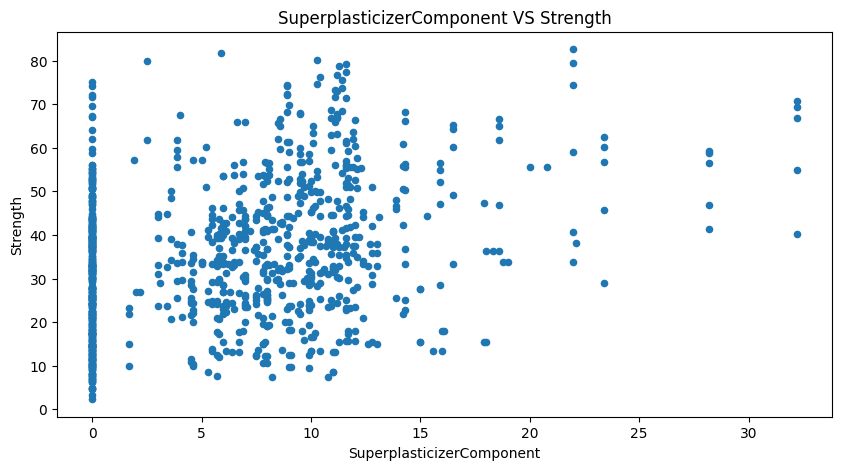

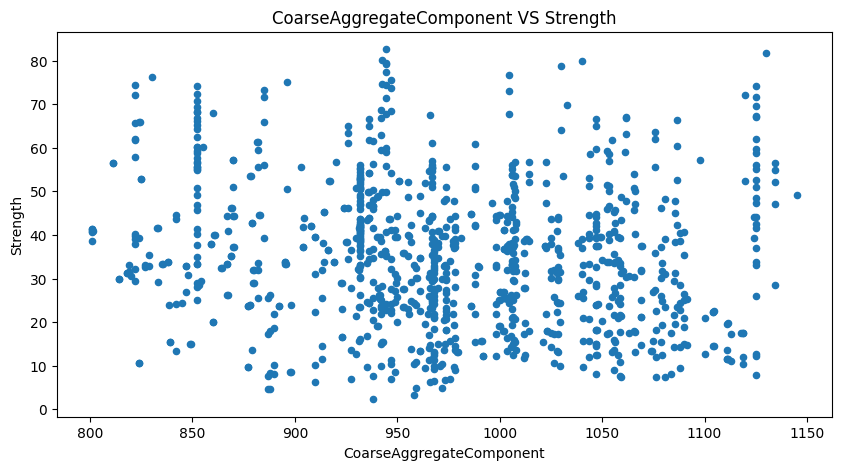

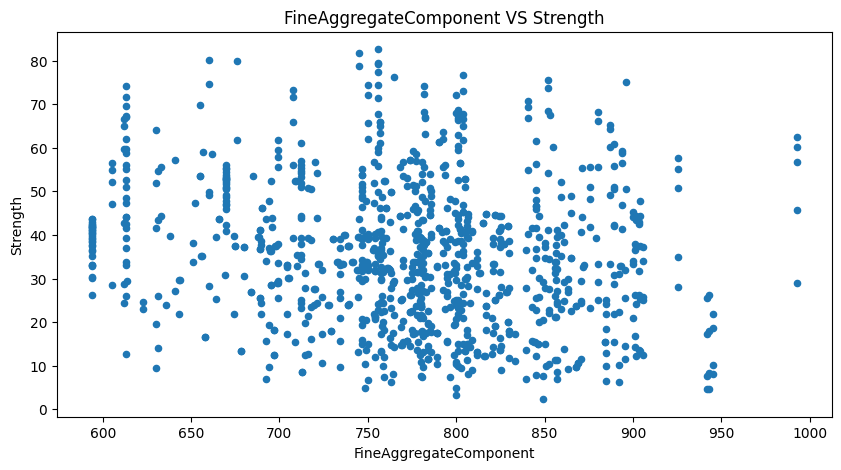

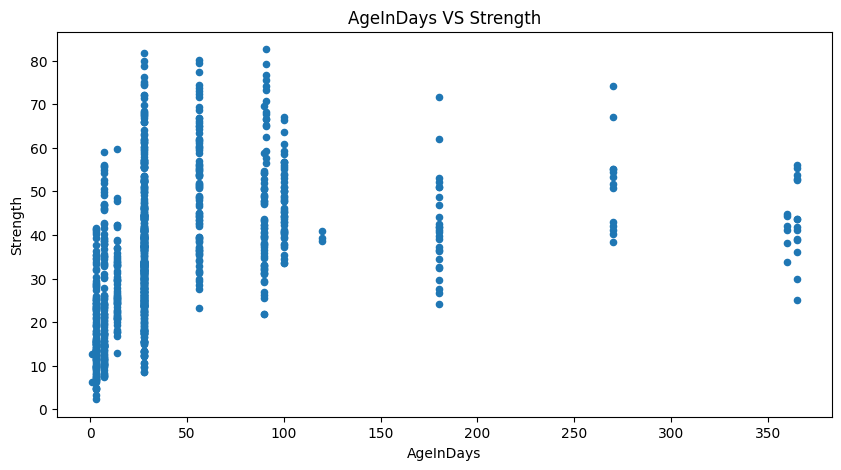

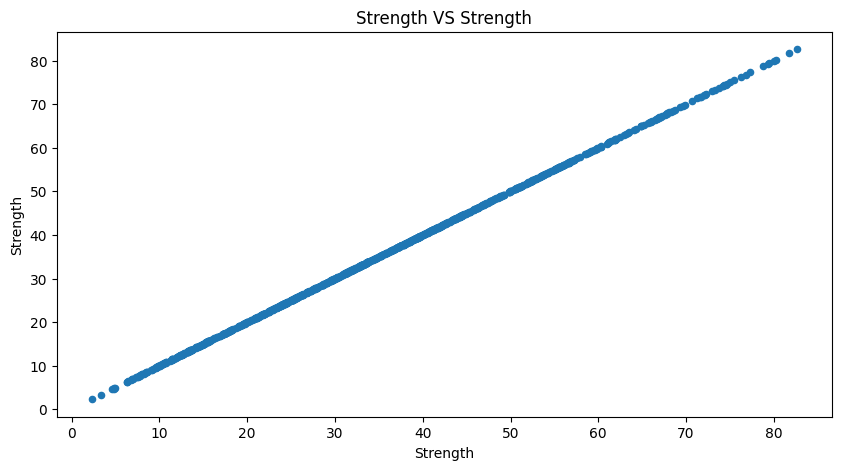

In [85]:
#ContinuousCols=['CementComponent ', 'BlastFurnaceSlag', 'FlyAshComponent',
   #             'WaterComponent', 'SuperplasticizerComponent','Strength', 
  #              'AgeInDays']

# Plotting scatter chart for each predictor vs the target variable
for predictor in numerical_col:
    df.plot.scatter(x=predictor, y='Strength', figsize=(10,5), title=predictor+" VS "+ 'Strength')

Numerical columns

In [373]:
df.columns

Index(['CementComponent ', 'BlastFurnaceSlag', 'FlyAshComponent',
       'WaterComponent', 'SuperplasticizerComponent',
       'CoarseAggregateComponent', 'FineAggregateComponent', 'AgeInDays',
       'Strength'],
      dtype='object')

In [86]:
numerical_col

['CementComponent',
 'BlastFurnaceSlag',
 'FlyAshComponent',
 'WaterComponent',
 'SuperplasticizerComponent',
 'CoarseAggregateComponent',
 'FineAggregateComponent',
 'AgeInDays',
 'Strength']

Input and target Feature

In [87]:
X = df.drop(labels=['Strength'],axis=1)
y = df[['Strength']]

In [88]:
X.head()

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [89]:
y.head()

,Strength
0,79.99
1,61.89
2,40.27
3,41.05
4,44.30


Train Test Split

In [90]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

Preprocessor Pipeline

In [97]:
numerical_col

['CementComponent',
 'BlastFurnaceSlag',
 'FlyAshComponent',
 'WaterComponent',
 'SuperplasticizerComponent',
 'CoarseAggregateComponent',
 'FineAggregateComponent',
 'AgeInDays',
 'Strength']

In [99]:
input_numerical_column=['CementComponent',
 'BlastFurnaceSlag',
 'FlyAshComponent',
 'WaterComponent',
 'SuperplasticizerComponent',
 'CoarseAggregateComponent',
 'FineAggregateComponent',
 'AgeInDays']

In [100]:
def create_numerical_pipeline(numerical_col):
    numerical_pipeline = Pipeline(steps=[
        ('impute', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler()),
        ('power', PowerTransformer(method='yeo-johnson', standardize=False))
    ])
    preprocessor = ColumnTransformer([
        ('numerical_pipeline', numerical_pipeline, numerical_col)
    ])
    return preprocessor
preprocessor=create_numerical_pipeline(numerical_col=input_numerical_column)

In [103]:
X_train.columns

Index(['CementComponent', 'BlastFurnaceSlag', 'FlyAshComponent',
       'WaterComponent', 'SuperplasticizerComponent',
       'CoarseAggregateComponent', 'FineAggregateComponent', 'AgeInDays'],
      dtype='object')

In [104]:
X_train=preprocessor.fit_transform(X_train)

In [105]:
X_train

array([[ 1.79772665, -1.19331916, -1.12461072, ..., -1.53788373,
         1.63292242, -1.20907314],
       [ 1.46535518, -1.19331916, -1.12461072, ..., -0.52254396,
        -1.96565071, -1.04254209],
       [-0.01046428, -1.19331916,  0.53273104, ...,  0.0167691 ,
         1.37223632, -1.20907314],
       ...,
       [-1.46386135,  0.61183874,  0.6964306 , ..., -1.3495293 ,
         0.65527352, -0.35776953],
       [-1.30401069,  0.50293241,  0.8779039 , ...,  0.4319012 ,
        -0.32300145,  0.47941924],
       [ 0.07687568,  0.91060852, -1.12461072, ...,  0.41622076,
         0.38570122, -1.04254209]])

In [106]:
X_test=preprocessor.transform(X_test)

In [107]:
from xgboost import XGBRegressor

In [108]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor



from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


evaluate Reg - Metrics

In [109]:
def evaluate_reg(true, predicted):
    r2 = r2_score(true, predicted) # Calculate r2 score
    MAE = mean_absolute_error(true, predicted) # Calculate MAE
    MSE = mean_squared_error(true, predicted) # Calculate MSE
    rmse = np.sqrt(mean_squared_error(true, predicted))

   
    return r2, MAE , MSE,rmse

In [110]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Lasso
from xgboost import XGBRegressor

In [112]:
import pandas as pd

models = {
    "Random Forest": RandomForestRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Linear Regression": LinearRegression(),
    "Ridge": Lasso(),
    "XGBRegressor": XGBRegressor(),
    "AdaBoost": AdaBoostRegressor()
}

results = pd.DataFrame(columns=['Model', 'r2_score_test', 'r2_score_train', 'MAE_test', 'MSE_test', 'rmse', 'MAE_train', 'MSE_train', 'rmse_train'])

for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Test set performance
    r2, MAE, MSE, rmse = evaluate_reg(y_test, y_test_pred)
    r2_train, MAE_train, MSE_train, rmse_train = evaluate_reg(y_train, y_train_pred)

    result = {
        'Model': model_name,
        'r2_score_test': r2,
        'r2_score_train': r2_train,
        'MAE_test': MAE,
        'MSE_test': MSE,
        'rmse': rmse,
        'MAE_train': MAE_train,
        'MSE_train': MSE_train,
        'rmse_train': rmse_train
    }

    results = pd.concat([results, pd.DataFrame(result, index=[0])], ignore_index=True)

    print(model_name)
    print('Model performance for Test set')
    print('- r2_score: {:.4f}'.format(r2))
    print('- MAE: {:.4f}'.format(MAE))
    print('- MSE: {:.4f}'.format(MSE))
    print('- rmse: {:.4f}'.format(rmse))

    print('Model performance for train set')
    print('- r2_score: {:.4f}'.format(r2_train))
    print('- MAE: {:.4f}'.format(MAE_train))
    print('- MSE: {:.4f}'.format(MSE_train))
    print('- rmse: {:.4f}'.format(rmse_train))

    print('=' * 35)
    print('=' * 35)
    print('\n')

print(results)


Random Forest
Model performance for Test set
- r2_score: 0.9068
- MAE: 3.5199
- MSE: 27.8159
- rmse: 5.2741
Model performance for train set
- r2_score: 0.9835
- MAE: 1.3706
- MSE: 4.2268
- rmse: 2.0559


Decision Tree
Model performance for Test set
- r2_score: 0.8860
- MAE: 3.7106
- MSE: 34.0138
- rmse: 5.8321
Model performance for train set
- r2_score: 0.9964
- MAE: 0.0944
- MSE: 0.9245
- rmse: 0.9615


Gradient Boosting
Model performance for Test set
- r2_score: 0.8947
- MAE: 4.1296
- MSE: 31.4048
- rmse: 5.6040
Model performance for train set
- r2_score: 0.9445
- MAE: 2.8358
- MSE: 14.2408
- rmse: 3.7737


Linear Regression
Model performance for Test set
- r2_score: 0.8009
- MAE: 5.9665
- MSE: 59.3823
- rmse: 7.7060
Model performance for train set
- r2_score: 0.8107
- MAE: 5.3597
- MSE: 48.5281
- rmse: 6.9662


Ridge
Model performance for Test set
- r2_score: 0.7326
- MAE: 6.9482
- MSE: 79.7838
- rmse: 8.9322
Model performance for train set
- r2_score: 0.7611
- MAE: 6.2133
- MSE: 61

In [113]:
results

,Model,r2_score_test,r2_score_train,MAE_test,MSE_test,rmse,MAE_train,MSE_train,rmse_train
0,Random Forest,0.906760,0.983516,3.519859,27.815944,5.274082,1.370585,4.226814,2.055922
1,Decision Tree,0.885984,0.996395,3.710572,34.013776,5.832133,0.094436,0.924483,0.961501
2,Gradient Boosting,0.894730,0.944462,4.129575,31.404808,5.603999,2.835828,14.240772,3.773695
3,Linear Regression,0.800948,0.810744,5.966510,59.382266,7.705989,5.359667,48.528119,6.966213
4,Ridge,0.732561,0.761067,6.948190,79.783810,8.932178,6.213279,61.265995,7.827260
5,XGBRegressor,0.941362,0.995443,2.627032,17.493186,4.182486,0.412443,1.168465,1.080956
6,AdaBoost,0.780355,0.809502,6.569519,65.525453,8.094779,5.911647,48.846522,6.989029


##### Lasso Regression - Feature Importance

In [114]:
from sklearn.linear_model import Lasso
numerical_col
lasso = Lasso(alpha=0.01)

lasso.fit(X_train, y_train)
lasso.coef_



array([11.4075247 ,  8.17543938,  4.00012666, -4.17696887,  0.95219715,
        0.57471118, -0.        , 16.4888881 ])

In [115]:
lasso.coef_

array([11.4075247 ,  8.17543938,  4.00012666, -4.17696887,  0.95219715,
        0.57471118, -0.        , 16.4888881 ])

In [116]:
numerical_col

['CementComponent',
 'BlastFurnaceSlag',
 'FlyAshComponent',
 'WaterComponent',
 'SuperplasticizerComponent',
 'CoarseAggregateComponent',
 'FineAggregateComponent',
 'AgeInDays',
 'Strength']

<Axes: >

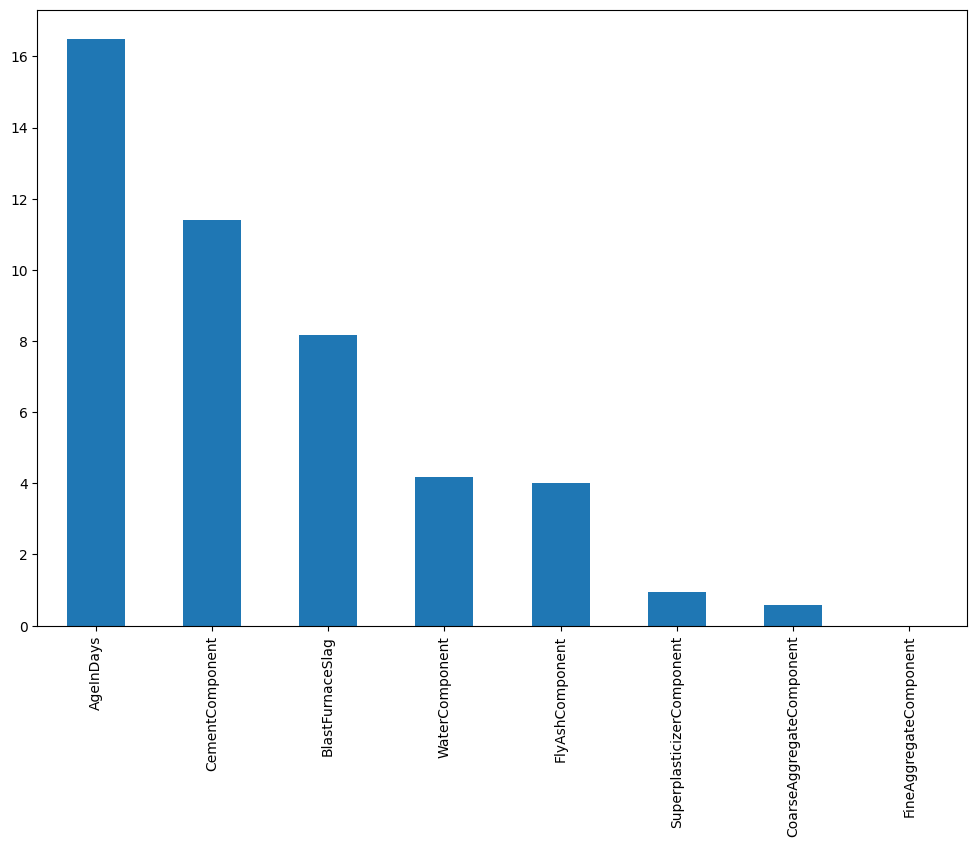

In [118]:
import matplotlib.pyplot as plt
import numpy as np

x = pd.Series(np.abs(lasso.coef_),index=input_numerical_column)
plt.figure(figsize=(12,8))
x.sort_values(ascending=False).plot(kind='bar')



In [119]:
feature_imp_lasso=x.sort_values(ascending=False).index
feature_imp_lasso

Index(['AgeInDays', 'CementComponent', 'BlastFurnaceSlag', 'WaterComponent',
       'FlyAshComponent', 'SuperplasticizerComponent',
       'CoarseAggregateComponent', 'FineAggregateComponent'],
      dtype='object')

##### Random forest _ Feature Importance

In [120]:
rf = RandomForestRegressor()

#dt.fit(X_train,y_train)
rf.fit(X_train,y_train)

RandomForestRegressor()

In [121]:
rf.feature_importances_


array([0.31469482, 0.07542589, 0.01625411, 0.09091757, 0.07675484,
       0.02669176, 0.04706369, 0.35219732])

<Axes: >

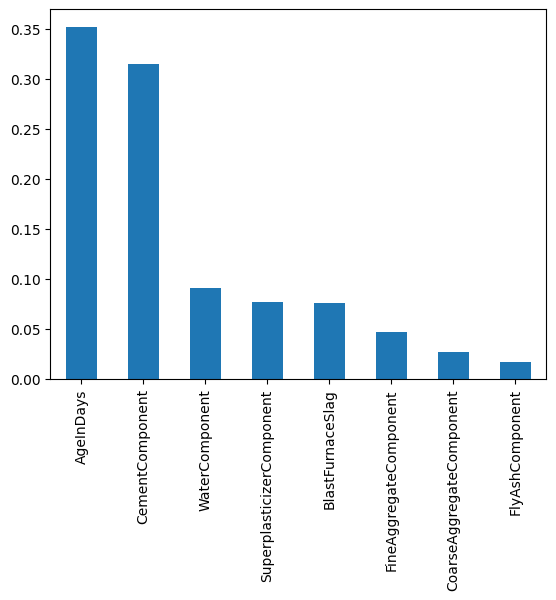

In [123]:
x = pd.Series(np.abs(rf.feature_importances_),index=input_numerical_column)

x.sort_values(ascending=False).plot(kind='bar')

In [124]:
feature_imp_rf=x.sort_values(ascending=False).index
feature_imp_rf

Index(['AgeInDays', 'CementComponent', 'WaterComponent',
       'SuperplasticizerComponent', 'BlastFurnaceSlag',
       'FineAggregateComponent', 'CoarseAggregateComponent',
       'FlyAshComponent'],
      dtype='object')

In [125]:
feature_imp_lasso

Index(['AgeInDays', 'CementComponent', 'BlastFurnaceSlag', 'WaterComponent',
       'FlyAshComponent', 'SuperplasticizerComponent',
       'CoarseAggregateComponent', 'FineAggregateComponent'],
      dtype='object')

In [126]:
feature_imp_rf

Index(['AgeInDays', 'CementComponent', 'WaterComponent',
       'SuperplasticizerComponent', 'BlastFurnaceSlag',
       'FineAggregateComponent', 'CoarseAggregateComponent',
       'FlyAshComponent'],
      dtype='object')

##### Model Training _ Selcted Features

In [134]:
selected_columns=['CementComponent', 'AgeInDays', 'WaterComponent', 'BlastFurnaceSlag',
       'SuperplasticizerComponent']

Training Selected Features

In [135]:
df.head()

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [136]:
df.columns

Index(['CementComponent', 'BlastFurnaceSlag', 'FlyAshComponent',
       'WaterComponent', 'SuperplasticizerComponent',
       'CoarseAggregateComponent', 'FineAggregateComponent', 'AgeInDays',
       'Strength'],
      dtype='object')

In [137]:
df.shape

(1005, 9)

In [138]:
X=df[selected_columns]
y = df[['Strength']]

In [139]:
X.head()

,CementComponent,AgeInDays,WaterComponent,BlastFurnaceSlag,SuperplasticizerComponent
0,540.0,28,162.0,0.0,2.5
1,540.0,28,162.0,0.0,2.5
2,332.5,270,228.0,142.5,0.0
3,332.5,365,228.0,142.5,0.0
4,198.6,360,192.0,132.4,0.0


In [140]:
X.shape

(1005, 5)

In [141]:
y.head()

,Strength
0,79.99
1,61.89
2,40.27
3,41.05
4,44.30


In [142]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [143]:
X_train.shape

(804, 5)

In [144]:
def create_numerical_pipeline(numerical_col):
    numerical_pipeline = Pipeline(steps=[
        ('impute', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler()),
        ('power', PowerTransformer(method='yeo-johnson', standardize=False))
    ])
    preprocessor = ColumnTransformer([
        ('numerical_pipeline', numerical_pipeline, numerical_col)
    ])
    return preprocessor


In [145]:


preprocessor=create_numerical_pipeline(numerical_col=selected_columns)

X_train=preprocessor.fit_transform(X_train)
X_test=preprocessor.transform(X_test)

In [146]:
X_train.shape

(804, 5)

Modle Training

In [147]:

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Lasso
from xgboost import XGBRegressor
import pandas as pd

Model Hyper Parameters

In [148]:

models = {
    "Random Forest": RandomForestRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
 #   "Gradient Boosting": GradientBoostingRegressor(),
    "Linear Regression": LinearRegression(),
    "Ridge": Lasso(),
    "XGBRegressor": XGBRegressor(),
    "AdaBoost": AdaBoostRegressor()
}

param_grid = {
    "Random Forest": {'n_estimators': [100, 200, 300], 'max_depth': [5, 10, 15]},
    "Decision Tree": {'max_depth': [5, 10, 15]},
   # "Gradient Boosting": {'n_estimators': [100, 200, 300], 'max_depth': [5, 10, 15]},
    "Linear Regression": {},
    "Ridge": {},
    "XGBRegressor": {'n_estimators': [100, 200, 300], 'max_depth': [5, 10, 15]},
    "AdaBoost": {'n_estimators': [100, 200, 300]}
}


Grid search CV

In [149]:


def perform_grid_search(model_name, model, param_grid, X_train, y_train, X_test, y_test):
    grid_model = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2')
    grid_model.fit(X_train, y_train)

    # Make predictions
    y_train_pred = grid_model.predict(X_train)
    y_test_pred = grid_model.predict(X_test)

    # Test set performance
    r2, MAE, MSE, rmse = evaluate_reg(y_test, y_test_pred)
    r2_train, MAE_train, MSE_train, rmse_train = evaluate_reg(y_train, y_train_pred)

    result = {
        'Model': model_name,
        'r2_score': r2,
        'MAE': MAE,
        'MSE': MSE,
        'rmse': rmse,
        'r2_train': r2_train,
        'MAE_train': MAE_train,
        'MSE_train': MSE_train,
        'rmse_train': rmse_train
    }

    return grid_model.best_params_, result

Results

In [152]:
def get_results(models, param_grid, X_train, y_train, X_test, y_test):
    best_model_test_r2 = None
    best_test_r2_score = -float('inf')
    best_model_params = None
    results = []

    for model_name, model in models.items():
        param_grid_model = param_grid[model_name]
        best_params, result = perform_grid_search(model_name, model, param_grid_model, X_train, y_train, X_test, y_test)

        result['Best parameters'] = best_params

        results.append(result)

        # Update best model based on test R2 score
        if result['r2_score'] > best_test_r2_score:
            best_test_r2_score = result['r2_score']
            best_model_test_r2 = model_name
            best_model_params = best_params

    results = pd.DataFrame(results, columns=['Model', 'r2_score', 'r2_train', 'MAE', 'MSE', 'rmse', 'MAE_train', 'MSE_train', 'rmse_train'])

    return results, best_model_test_r2, best_model_params

In [153]:


results,best_model,best_model_params = get_results(models, param_grid, X_train, y_train, X_test, y_test)
print(results)

               Model  r2_score  r2_train       MAE        MSE      rmse  \
0      Random Forest  0.911346  0.981730  3.599847  26.447813  5.142744   
1      Decision Tree  0.878688  0.994201  3.874303  36.190436  6.015849   
2  Linear Regression  0.782972  0.789211  6.181111  64.744970  8.046426   
3              Ridge  0.728935  0.757797  6.993743  80.865487  8.992524   
4       XGBRegressor  0.940698  0.992752  2.866294  17.691401  4.206115   
5           AdaBoost  0.801186  0.816984  6.292977  59.311094  7.701370   

   MAE_train  MSE_train  rmse_train  
0   1.456832   4.684665    2.164409  
1   0.228362   1.486968    1.219413  
2   5.685751  54.049351    7.351826  
3   6.265463  62.104495    7.880641  
4   0.596116   1.858430    1.363242  
5   5.722847  46.928026    6.850403  


In [154]:
best_model

'XGBRegressor'

In [155]:
results

,Model,r2_score,r2_train,MAE,MSE,rmse,MAE_train,MSE_train,rmse_train
0,Random Forest,0.911346,0.981730,3.599847,26.447813,5.142744,1.456832,4.684665,2.164409
1,Decision Tree,0.878688,0.994201,3.874303,36.190436,6.015849,0.228362,1.486968,1.219413
2,Linear Regression,0.782972,0.789211,6.181111,64.744970,8.046426,5.685751,54.049351,7.351826
3,Ridge,0.728935,0.757797,6.993743,80.865487,8.992524,6.265463,62.104495,7.880641
4,XGBRegressor,0.940698,0.992752,2.866294,17.691401,4.206115,0.596116,1.858430,1.363242
5,AdaBoost,0.801186,0.816984,6.292977,59.311094,7.701370,5.722847,46.928026,6.850403


Selecting Model with best R2 Score - XGB Regressor

In [156]:
selected_columns

['CementComponent',
 'AgeInDays',
 'WaterComponent',
 'BlastFurnaceSlag',
 'SuperplasticizerComponent']

#### Model Training - Best Model - Hyper Paramters



In [157]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Define your XGBoost regressor
xgb_regressor = xgb.XGBRegressor()


In [435]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],  # Example values, you can adjust these
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5],
    'gamma': [0, 0.1, 0.5]
}
grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, cv=3, scoring='r2')
grid_search.fit(X_train, y_train)  # X_train and y_train are your training data

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Retrain the model with the best parameters
best_xgb_regressor = xgb.XGBRegressor(**best_params)
best_xgb_regressor.fit(X_train, y_train)

# Evaluate the model on the test set

y_pred = best_xgb_regressor.predict(X_test)

In [436]:
def calculate_r2_score(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    return r2
calculate_r2_score(y_true=y_test,y_pred=y_pred)

0.9363862013022404

Converting arrays to dataframe

In [421]:

def convert_to_dataframe(X_train, X_test, y_train, y_test,feature_column_list):
    X_train_df = pd.DataFrame(X_train, columns=feature_column_list)
    X_test_df = pd.DataFrame(X_test, columns=feature_column_list)
    y_train_df = pd.DataFrame(y_train, columns=['Strength'])
    y_test_df = pd.DataFrame(y_test, columns=['Strength'])

    return X_train_df, X_test_df, y_train_df,y_test_df
X_train_df, X_test_df, y_train_df,y_test_df=convert_to_dataframe(X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test,feature_column_list=selected_columns)

In [291]:
X_train_df.head()

,CementComponent,AgeInDays,WaterComponent,BlastFurnaceSlag,SuperplasticizerComponent
0,1.475745,0.463277,8.217200,1.712971,2.515244
1,3.945246,0.463277,8.353293,0.253092,1.425305
2,2.559757,0.049637,7.485113,0.000000,1.660061
3,2.344816,0.463277,9.104150,1.115905,1.341464
4,1.571585,0.049637,7.428799,0.485476,1.810976


In [292]:
y_train_df.head()

,Strength
995,27.68
507,62.05
334,23.80
848,33.40
294,7.40


In [293]:
def plot_feature_importance(feature_names, importances, model_name):
    # Sort feature importances in descending order
    indices = np.argsort(importances)[::-1]
    sorted_feature_names = [str(feature_names[i]) for i in indices]
    sorted_importances = importances[indices]

    # Plot feature importances
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(importances)), sorted_importances, align='center')
    plt.xticks(range(len(importances)), sorted_feature_names, rotation=90)
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.title(f'Feature Importance - {model_name}')
    plt.tight_layout()
    plt.show()




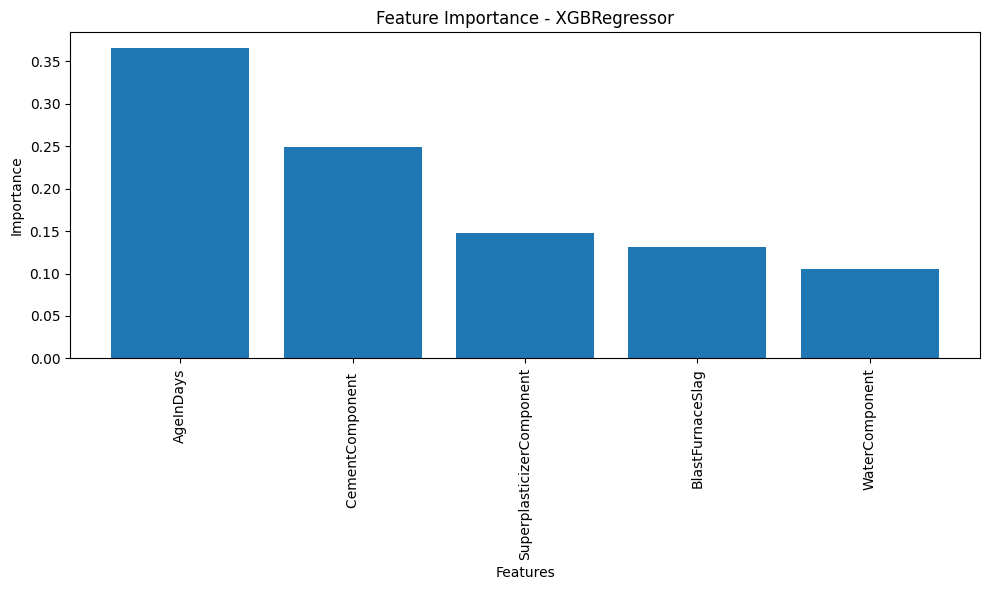

In [294]:
def predict_with_best_model(best_model, best_params, X_train, y_train, X_test):
    model = models[best_model]  # Retrieve the best model object
    model.set_params(**best_params)  # Set the best parameters for the model
    model.fit(X_train, y_train)  # Train the model with the best parameters

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Get feature importances if available
    if hasattr(model, 'feature_importances_'):
        feature_names = X_train.columns
        importances = model.feature_importances_
        plot_feature_importance(feature_names, importances, best_model)

    return y_pred




y_pred=predict_with_best_model(best_model=best_model,best_params=best_model_params, X_train=X_train_df, y_train=y_train_df, X_test=X_test_df)

In [295]:
def calculate_r2_score(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    return r2

In [296]:
calculate_r2_score(y_test, y_pred)

0.9300229535854061

Checking Predicted Values

In [308]:
def print_model_accuracy(y_test, y_pred):
    print('\n##### Model Validation and Accuracy Calculations ##########')

    # Creating a DataFrame to display sample values of prediction
    testing_data_results = pd.DataFrame({
        'Actual': y_test['Strength'],
        'Predicted': np.round(y_pred)
    }, index=y_test.index)

    print(testing_data_results.head())
    
    return testing_data_results

# Example usage with DataFrames
TestingDataResults=print_model_accuracy(y_test_df, y_pred)


##### Model Validation and Accuracy Calculations ##########
     Actual  Predicted
31    52.91       52.0
109   55.90       42.0
136   74.50       71.0
88    35.30       34.0
918   10.54        9.0


Error for each row

In [312]:
# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Actual']-TestingDataResults['Predicted']))/TestingDataResults['Actual'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

Mean Accuracy on test data: 90.97953160980194
Median Accuracy on test data: 93.86782114731328


In [314]:
# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)
custom_Scoring

make_scorer(Accuracy_Score)

Cross Validation

In [336]:
model=best_model

'XGBRegressor'

In [337]:
best_model_params

{'max_depth': 5, 'n_estimators': 100}

Cross validation

In [343]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import cross_val_score


def cross_validate_xgboost(X, y, n_folds=10, params=None, eval_metric=None, test_size=0.2, random_state=42):
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Create an XGBoost model with the provided parameters
    xgb_model = xgb.XGBRegressor(**params) if params else xgb.XGBRegressor()

    # Perform cross-validation
    scores = cross_val_score(xgb_model, X_train, y_train, cv=n_folds, scoring=eval_metric)

    # Print the performance metric for each fold
    for i, score in enumerate(scores):
        print(f"Fold {i+1}: {score}")

    # Return the average performance metric across all folds
    avg_score = scores.mean()
    print(f"\nAverage : {avg_score}")

    # Return the best score obtained during cross-validation
    best_score = max(scores)
    print(f"Best : {best_score}")

    return best_score

avg_score=cross_validate_xgboost(X=X,y=y,params=best_model_params)

Fold 1: 0.9147356159665337
Fold 2: 0.9278948035805545
Fold 3: 0.9343564227942386
Fold 4: 0.8824333741375481
Fold 5: 0.9629063475340391
Fold 6: 0.9028441492882836
Fold 7: 0.9404919019261826
Fold 8: 0.9403731277713815
Fold 9: 0.9277136342105967
Fold 10: 0.9096714587127362

Average : 0.9243420835922095
Best : 0.9629063475340391


#### Feature selection


1. Reducible 
2. Irreducible 

In [45]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

LR = LinearRegression()

exh = EFS(LR, max_features=6, scoring='accuracy', cv=5)
sel = exh.fit(X_train, y_train)

In [ ]:
lr = LinearRegression()

exh = EFS(lr, max_features=6, scoring='accuracy', cv=5)

In [48]:
X_train

array([[ 1.47574514,  1.71297114,  1.81358251, ...,  2.51524418,
        12.12127161,  0.46327707],
       [ 3.94524552,  0.25309177,  2.06373182, ...,  1.42530503,
        10.45178355,  0.46327707],
       [ 2.55975718,  0.        ,  1.8980079 , ...,  1.66006116,
        13.39659264,  0.04963683],
       ...,
       [ 1.77070807,  0.        ,  1.95741836, ...,  1.66006116,
        13.7195553 ,  1.65456096],
       [ 4.41979156,  1.36669557,  0.        , ...,  1.49237821,
        10.83450701,  0.46327707],
       [ 2.92171485,  0.        ,  1.76667951, ...,  1.67682945,
        11.76143526,  0.46327707]])

In [51]:
y_train=np.array(y_train)
y_train

array([[27.68],
       [62.05],
       [23.8 ],
       [33.4 ],
       [ 7.4 ],
       [27.77],
       [18.29],
       [48.59],
       [39.7 ],
       [ 4.57],
       [13.29],
       [36.97],
       [22.53],
       [71.3 ],
       [25.61],
       [76.24],
       [62.94],
       [17.54],
       [41.05],
       [21.86],
       [47.13],
       [16.5 ],
       [22.72],
       [29.72],
       [19.93],
       [ 9.62],
       [39.05],
       [42.13],
       [39.32],
       [34.49],
       [28.1 ],
       [38.6 ],
       [53.77],
       [ 7.32],
       [32.82],
       [43.38],
       [55.16],
       [35.23],
       [66.7 ],
       [30.88],
       [76.8 ],
       [17.96],
       [55.06],
       [64.3 ],
       [33.8 ],
       [45.94],
       [37.26],
       [24.85],
       [40.15],
       [13.54],
       [32.88],
       [17.57],
       [21.54],
       [17.84],
       [23.4 ],
       [55.55],
       [17.6 ],
       [31.42],
       [13.82],
       [65.91],
       [81.75],
       [28.8 ],
       [

In [52]:
sel = exh.fit(X_train, y_train)

Features: 126/126

UnboundLocalError: cannot access local variable 'best_subset' where it is not associated with a value

In [ ]:
sel.best_score_

In [ ]:
sel.best_feature_names_

Backward elimination